### IMT 574 Final Project - Group 2 

Collaborators: Khoi Nguyen-Davis, Rahul Rastogi, Ankitha Ballal, Disha Santhosh

Dataset used: https://www.kaggle.com/datasets/jockeroika/life-style-data?resource=download

#### Data Loading and Overview

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [43]:
df = pd.read_csv("/Users/dishasanthosh/Desktop/Group 2-IMT574/Data/Final_data.csv")

In [44]:
#checking the overall structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

No missing values: every column shows 20,000 non-null entries.

Dtypes mix: 39 numerical (float64) and 15 categorical (object) 

In [45]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
17637,45.92,Female,89.04,1.63,165.91,146.24,65.78,0.75,659.40,Cardio,33.912032,3.52,1.99,1.00,33.51,2.00,0.01,237.82,95.00,63.43,2335.0,Other,Lunch,Balanced,12.94,352.92,182.17,434.69,Grilled,10.11,79.09,4.10,Burpees,5.00,20.89,Combines lower body and upper body strength,367.16,"Upper Back, Rear Deltoids",Dumbbells or Barbell,Advanced,Legs,Posterior,Chest flyes,33.512740,1902.15,0.500108,1.066936,0.803555,0.881442,1675.60,58.844727,550.7400,1.278745e+20,Very High
1957,21.93,Female,101.77,1.84,163.19,152.43,65.27,1.24,1188.42,Cardio,31.713564,2.72,3.00,1.98,30.06,3.00,-0.05,230.14,91.82,61.58,2699.0,Other,Dinner,Balanced,13.69,410.28,271.16,234.99,Steamed,33.56,79.08,3.07,Superman,4.01,21.15,Improves posture and strengthens upper back,343.47,Core,Bench or Sturdy Surface,Intermediate,Legs,Lateral,Leg extensions,30.059664,1842.06,0.499745,0.902231,0.890114,0.934065,1510.58,69.495106,851.8056,7.415931e+19,Medium
8119,34.44,Male,75.08,1.57,177.97,157.71,51.90,1.47,1456.62,Strength,31.053741,2.41,3.00,1.01,30.46,3.00,0.98,280.22,111.55,74.35,2090.0,Other,Breakfast,Balanced,30.52,92.10,110.36,162.60,Fried,6.93,68.77,2.87,Bird Dogs,3.98,24.93,Strengthens triceps and chest,356.64,"Core, Obliques",Bench or Sturdy Surface,Advanced,Back,Anterior,Plank,30.459654,2236.23,0.501236,1.485749,0.839296,0.886161,633.38,51.764851,1048.5216,1.008432e+20,High
7714,52.00,Female,47.93,1.54,197.84,146.04,62.95,1.33,1436.40,Strength,22.599337,1.91,2.97,2.00,20.21,3.02,0.00,210.70,83.97,56.20,1524.0,Other,Lunch,Balanced,21.58,2369.87,45.06,211.24,Baked,32.84,113.63,4.10,Seated Rows,4.01,22.01,Builds lower body power and endurance,362.04,"Triceps, Chest",Kettlebell,Intermediate,Forearms,Posterior,Incline dumbbell press,20.209985,1684.48,0.500332,1.751930,0.615983,0.738172,87.60,37.098138,963.0264,1.140148e+20,Very High
6001,41.12,Female,72.09,1.83,175.06,133.27,57.84,1.13,1218.37,Strength,27.468004,2.80,3.00,1.98,21.53,2.99,0.04,217.92,86.51,58.63,2026.0,Other,Breakfast,Keto,48.70,753.51,143.38,313.59,Steamed,6.75,23.57,3.77,Decline Push-ups,5.00,23.05,Improves core stability and balance,341.13,Full Core,Pull-up Bar,Intermediate,Shoulders,Lateral,Decline dumbbell flyes,21.526471,1745.39,0.499418,1.200028,0.643491,0.761282,807.63,52.288316,770.9538,7.013201e+19,Medium


In [46]:
#checking for invalid values
invalid_mask = df.isin(['?', 'n/a', 'N/A', 'na', 'NA', 'NaN'])
invalid_counts = invalid_mask.sum().sort_values(ascending=False)

invalid_counts[invalid_counts > 0]


Series([], dtype: int64)

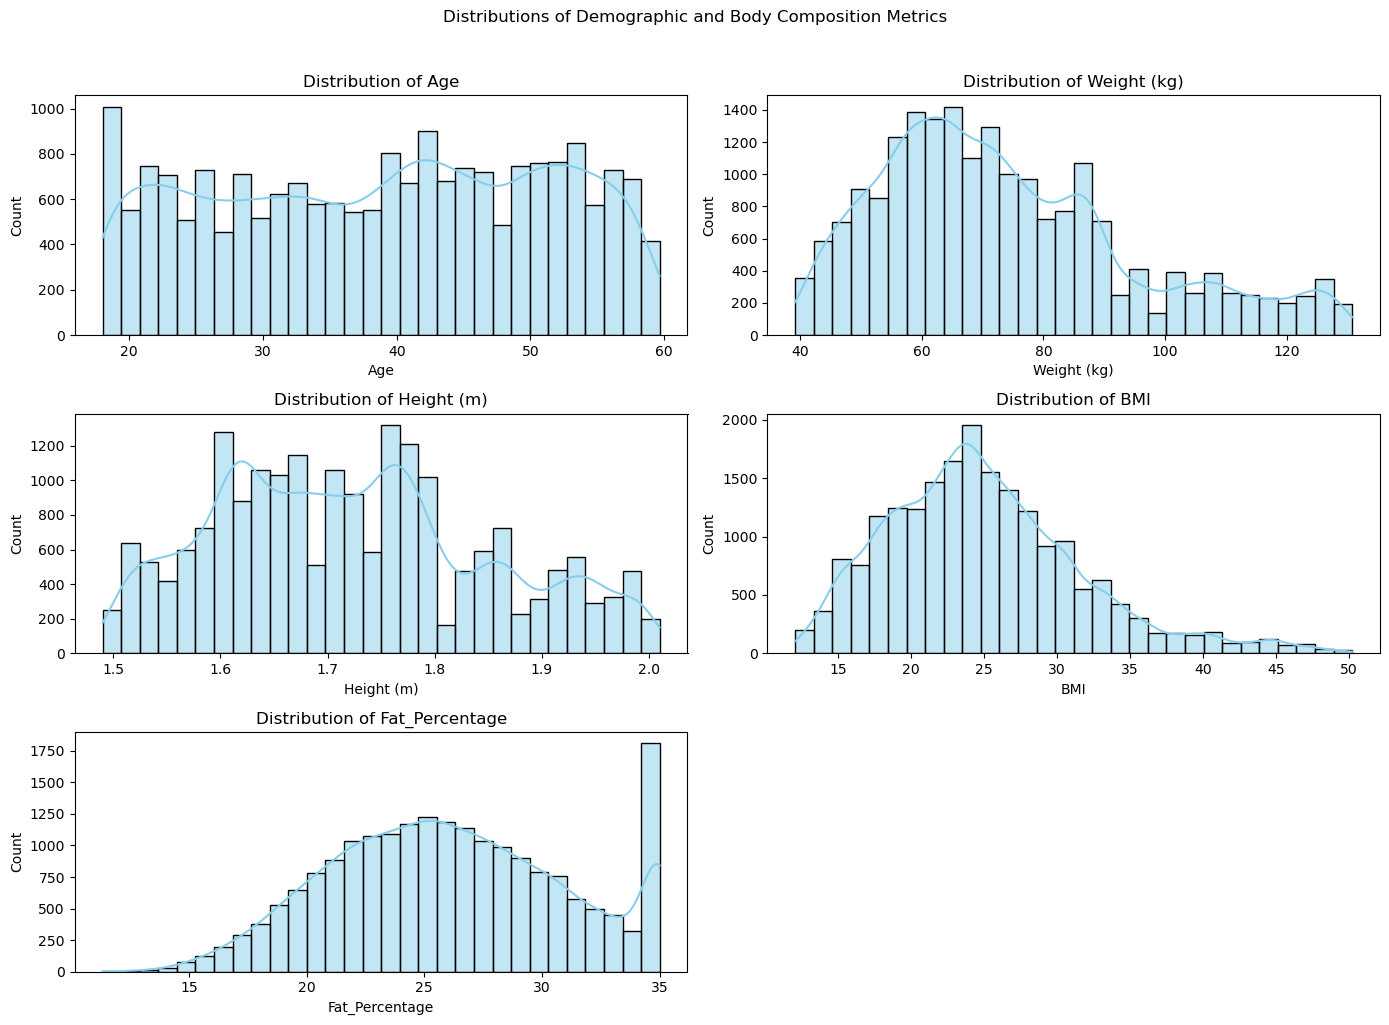

In [47]:
#study the distribution of demographics and health stats
demo_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage']

plt.figure(figsize=(14, 10))
for i, col in enumerate(demo_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
plt.suptitle("Distributions of Demographic and Body Composition Metrics",y=1.02)
plt.tight_layout()
plt.show()

RQ1: Calorie Burn Prediction

To what extent can biometric (age, gender, BMI) and workout features (duration, type, BPM) predict calories burned in a session?


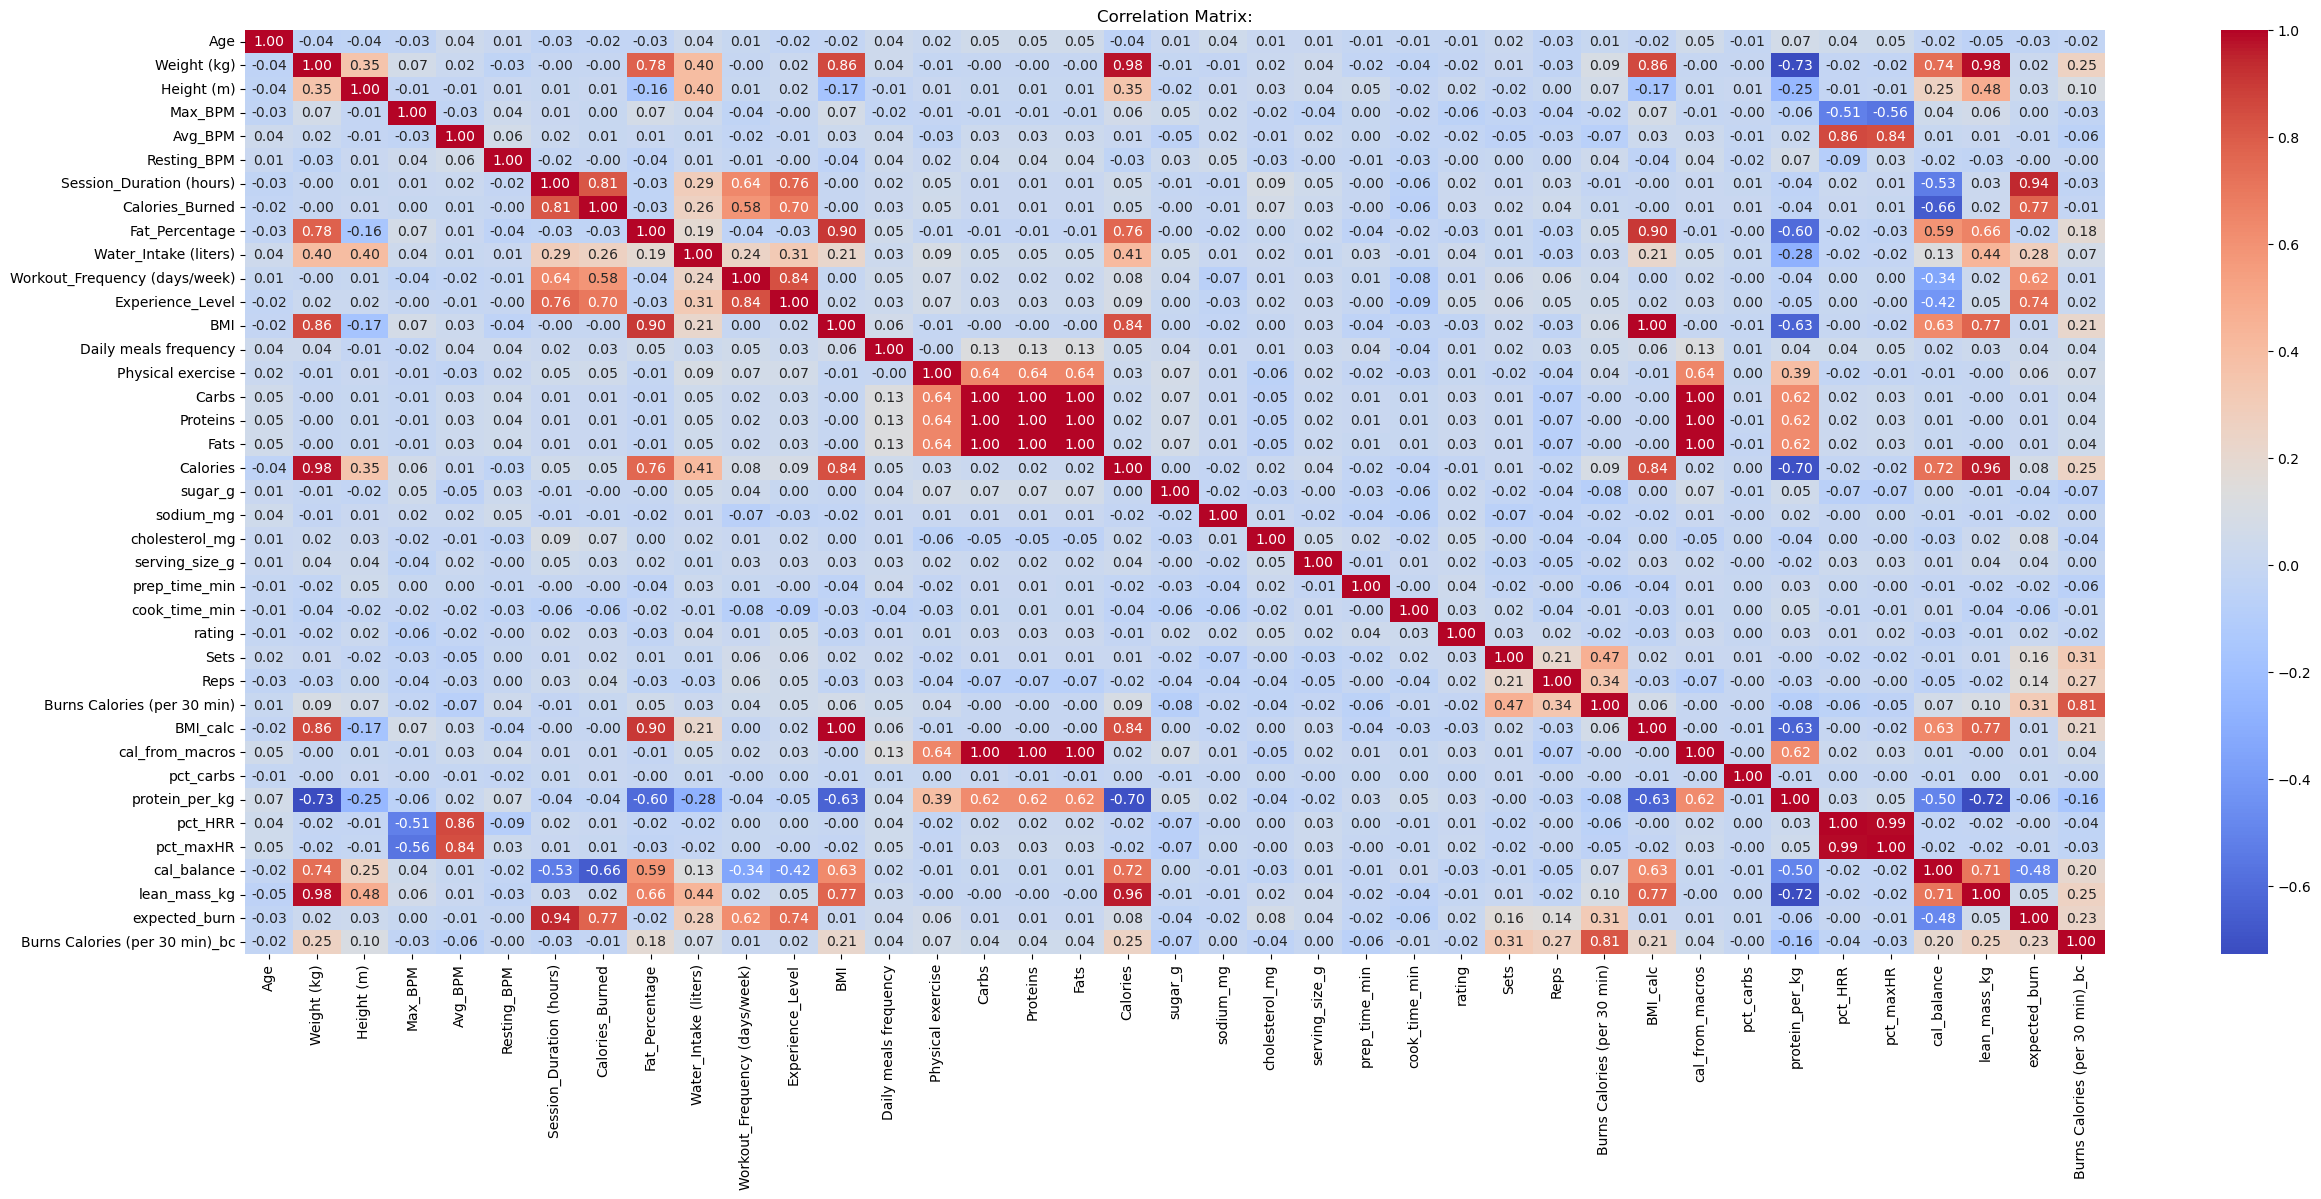

In [48]:
#checking correlation

# physical_cols = [
#     'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage',
#     'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Calories_Burned'
# ]

# corr = df[physical_cols].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Correlation Heatmap: Physical & Fitness Metrics", fontsize=14)
# plt.show()

corr = df.corr(numeric_only = True)

plt.figure(figsize=(30,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix:")
plt.show()

BMI, Weight and Fat_Percentage show very string positive correlation. 
Calories_Burned shows weak correlation with Age, Weight, Height or BMI- indicating Calories_burned shows weak correlation with static attributes.

In [49]:
#encoding categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)

In [50]:
target = df['Calories_Burned']

workout_cols = [col for col in df.columns if col.startswith('Workout_Type_')]
predictors  = [
    'Age',
    'Gender',
    'BMI',
    'Session_Duration (hours)',
    'Avg_BPM',
    'Max_BPM',
    'Workout_Frequency (days/week)'
] + workout_cols

In [51]:
#splitting to train and test data
X = df[predictors]
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#scaling numeric variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
#model 1 - Linear Regression

model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred_model1 = model1.predict(X_test_scaled)

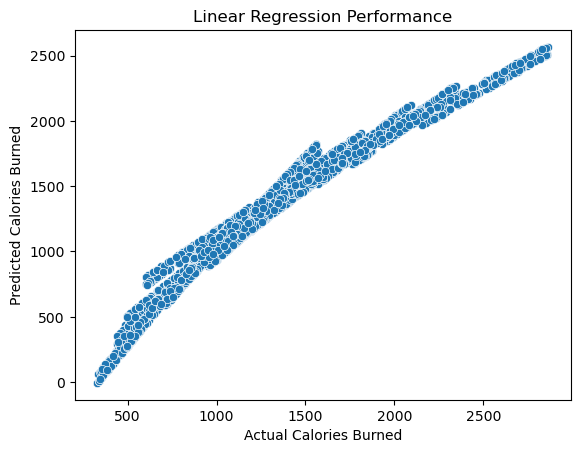

In [54]:
sns.scatterplot(x=y_test, y=y_pred_model1)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Linear Regression Performance')
plt.show()


In [37]:
#model2 - RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)


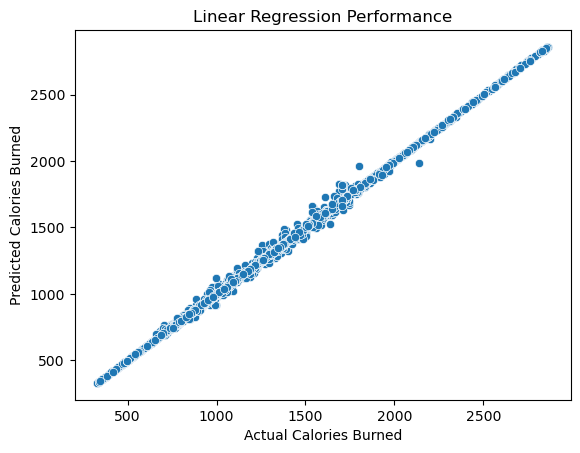

In [55]:
sns.scatterplot(x=y_test, y=y_pred_model2)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Linear Regression Performance')
plt.show()

Linear Regression:
 R² = 0.960
 MAE = 74.04
 RMSE = 100.26

Random Forest Regressor:
 R² = 0.999
 MAE = 5.86
 RMSE = 14.44



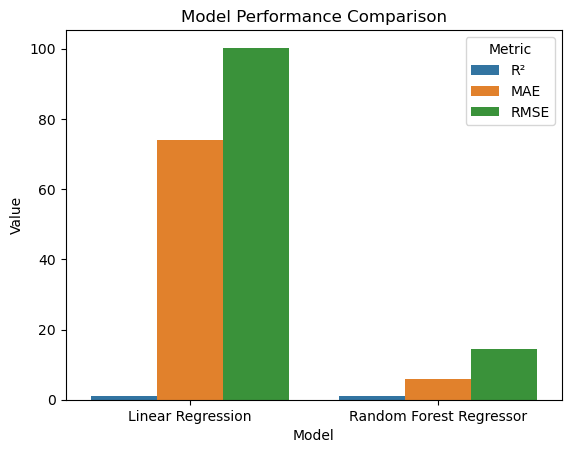

In [58]:
from sklearn.metrics import root_mean_squared_error


def evaluate_model(name, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}:\n R² = {r2:.3f}\n MAE = {mae:.2f}\n RMSE = {rmse:.2f}\n")
    return {'Model': name, 'R²': r2, 'MAE': mae, 'RMSE': rmse}

results = []
results.append(evaluate_model("Linear Regression", y_test, y_pred_model1))
results.append(evaluate_model("Random Forest Regressor", y_test, y_pred_model2))

results_df = pd.DataFrame(results)
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Value'),
            x='Model', y='Value', hue='Metric')
plt.title("Model Performance Comparison")
plt.show()


In [59]:
#chceck for overfitting using cross validation